## Convert imaging data

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
from showit import image

In [21]:
from mesoscope.preprocess import loadImages
from mesoscope.utils import normalize

In [22]:
from skimage.io import imsave

In [23]:
from os.path import exists
from os import mkdir
from json import dump

###Set directory and session information

In [24]:
directory = '/tier2/freeman/Nick/mVR/sessions'

## Load data

In [25]:
key = '000134'
prefix = 'trial'
path = directory + '/' + key
print path
print exists(path)

/tier2/freeman/Nick/mVR/sessions/000134
True


In [26]:
meta, data = loadImages(path + '/images-raw/' + prefix + '*', engine = sc)

In [27]:
print data
print '\n', meta

Images
mode: spark
dtype: int16
shape: (8585, 4, 512, 512)

{'nrois': 4, 'power': 90, 'nchannels': 1, 'nplanes': 1, 'averaging': u'_Inf_', 'depths': 280, 'rois': [{'depths': 0, 'npixels': [512, 512], 'center': [-1.3655618570475, 0.04612312811925], 'size': [0.60890717601, 0.608906999925]}, {'depths': 0, 'npixels': [512, 512], 'center': [0.7761814382700001, 0.126838602324], 'size': [0.60890717601, 0.608906999925]}, {'depths': 0, 'npixels': [512, 512], 'center': [1.0896736739175, -1.4874708818025], 'size': [0.60890717601, 0.608906999925]}, {'depths': 0, 'npixels': [512, 512], 'center': [-1.60688723895, -1.3836938435775], 'size': [0.60890717601, 0.608906999925]}], 'shape': (8585, 4, 512, 512), 'volumeRate': 9.453582908}


## Inspect data

In [28]:
mean = data.mean().toarray()

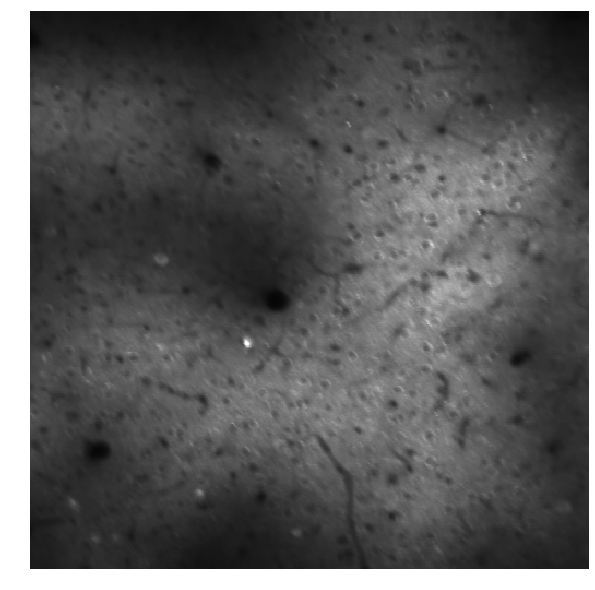

In [30]:
img = mean[0]
image(img, clim=(0, 3.5*img.mean()), size = 10);

##Save binary images

In [31]:
if not exists(path + '/images'):
    mkdir(path + '/images')
data.tobinary(path + '/images', overwrite=True)

##Save summary data

###Meta data

In [32]:
if not exists(path + '/summary'):
    mkdir(path + '/summary')
with open(path + '/summary/meta.json', 'w') as fid:
    dump(meta, fid, indent=2)

###Raw tiffs

In [33]:
imsave(path + '/summary/raw-' + prefix + '.tif', mean.astype('float32'), plugin='tifffile', photometric='minisblack')

###Normalized tiffs

In [34]:
norm = normalize(mean).astype('float32')
#norm = data.map(normalize)

In [35]:
imsave(path + '/summary/raw-norm-' + prefix + '.tif', norm, plugin='tifffile', photometric='minisblack')